# Exploratory Data Analysis
##### In this we will learn how to do EDA using python.
##### steps are:
##### understand the data,clean and then find a relation between data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
kashti=sns.load_dataset("titanic")

In [3]:
#to saw our data 
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#to get the total numbers of rows and columns
kashti.shape

(891, 15)

In [5]:
kashti.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [6]:
#to get column name
kashti.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
#to get the type of values we have in our whole dataset column helpful in plotting
kashti['sex'].unique()
kashti['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [8]:
#to get unique values of all columns together
#lambda is used as a short cut for func
kashti.apply(lambda col: col.unique())

#using Function 
def ks(col):
    return col.unique()

kashti.apply(ks)

survived                                                  [0, 1]
pclass                                                 [3, 1, 2]
sex                                               [male, female]
age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
sibsp                                      [1, 0, 3, 4, 2, 5, 8]
parch                                      [0, 1, 2, 5, 3, 4, 6]
fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
embarked                                          [S, C, Q, nan]
class          ['Third', 'First', 'Second']
Categories (3, ob...
who                                          [man, woman, child]
adult_male                                         [True, False]
deck           [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categ...
embark_town            [Southampton, Cherbourg, Queenstown, nan]
alive                                                  [no, yes]
alone                                              [False, True]
dtype: object

## Cleaning and filtering the Data

In [9]:
#find missinf values inside
kashti.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
#drop the one with most null values
ks_clean=kashti.drop(['deck'],axis=1)
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [11]:
ks_clean=ks_clean.dropna()

In [12]:
ks_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
#to get counts
ks_clean['sex'].value_counts()

sex
male      453
female    259
Name: count, dtype: int64

In [15]:
ks_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [16]:
ks_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<Axes: xlabel='sex', ylabel='age'>

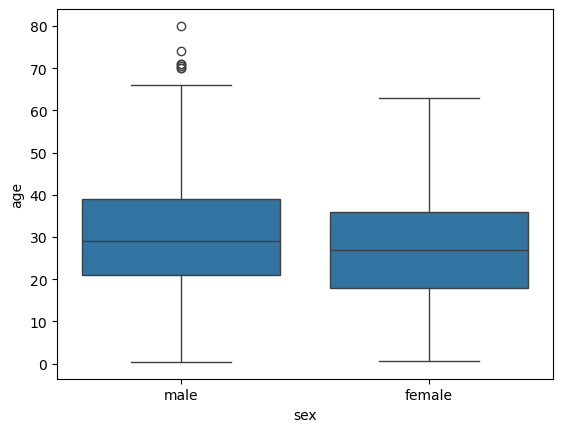

In [21]:
#agar hum is data ko dekhen tw is me 68 se uper wlay outliers hai tw usko remove karke bhi hum dekh sakte hai eg is below
sns.boxplot(x='sex',y='age',data=ks_clean)

In [22]:
ks_clean['age'].mean()

29.64209269662921

In [30]:
filtered = ks_clean[ks_clean['age'] < 68]
mean_age = filtered['age'].mean()
mean_age

29.21797163120567

C:\Users\CC\AppData\Local\Temp\ipykernel_1756\393399953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ks_clean['age'])


<Axes: xlabel='age', ylabel='Density'>

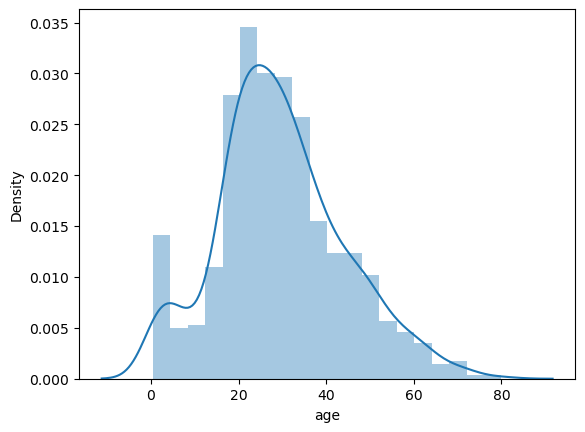

In [20]:
sns.distplot(ks_clean['age'])